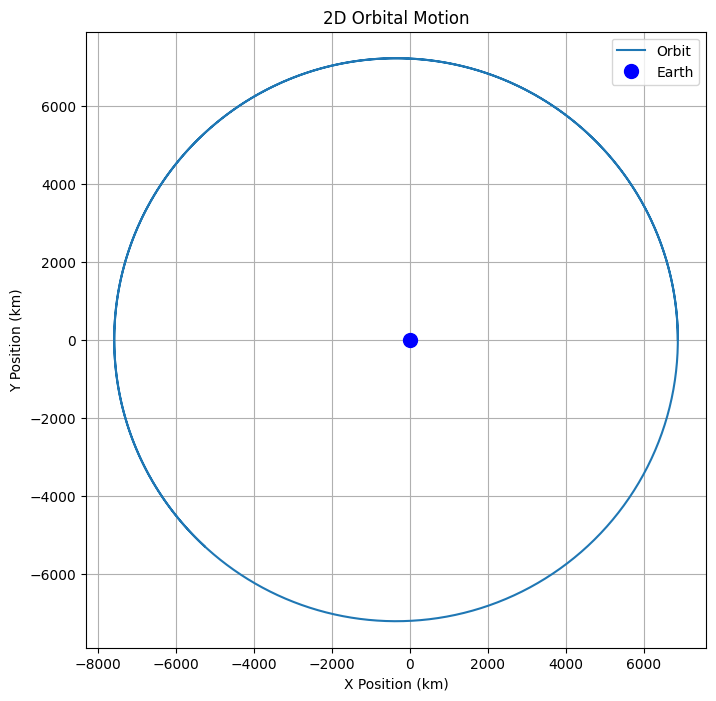

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)

# Initial state vector
X0 = [x0, y0, vx0, vy0]

# Time span
T = 10000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)

# Define the orbital dynamics
def orbital_dynamics(t, X):
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)  # Distance from the center of the Earth
    ax = -G * M * x / r**3    # Acceleration in x
    ay = -G * M * y / r**3    # Acceleration in y
    return [vx, vy, ax, ay]

# Solve the orbital dynamics
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract the results
x, y = sol.y[0], sol.y[1]

# Visualization
plt.figure(figsize=(8, 8))
plt.plot(x / 1e3, y / 1e3, label="Orbit")  # Convert to kilometers for better visualization
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)  # Earth's center
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("2D Orbital Motion")
plt.legend()
plt.grid()
plt.axis('equal')  # Equal scaling for x and y axes
plt.show()


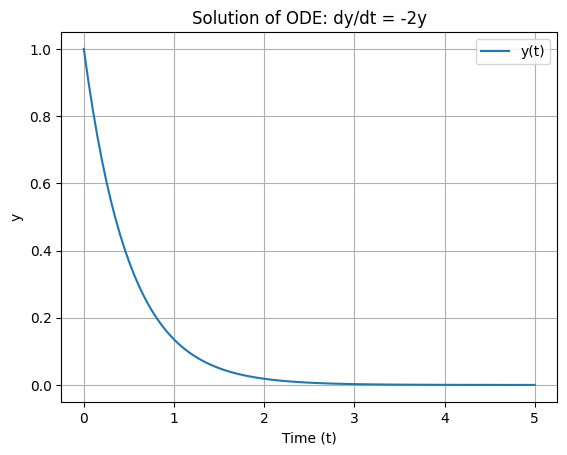

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define ODE function
def linear_ode(t, y):
    return -2 * y

# Initial condition
y0 = [1.0]
t_span = (0, 5)  # Time range
t_eval = np.linspace(0, 5, 100)  # Time points to evaluate

# Solve ODE
sol = solve_ivp(linear_ode, t_span, y0, t_eval=t_eval)

# Plot solution
plt.plot(sol.t, sol.y[0], label="y(t)")
plt.xlabel("Time (t)")
plt.ylabel("y")
plt.title("Solution of ODE: dy/dt = -2y")
plt.legend()
plt.grid()
plt.show()


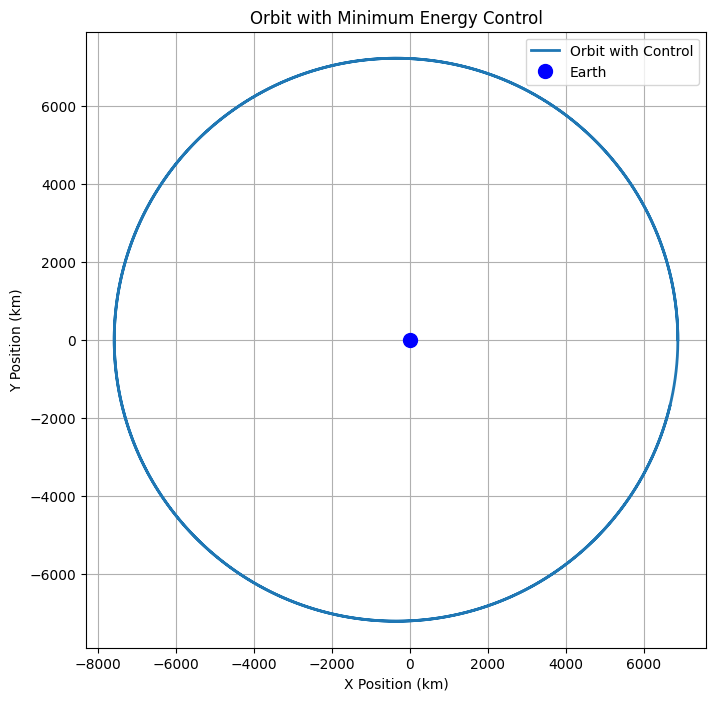

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)

# Target circular orbit radius
r_target = r0
v_target = np.sqrt(G * M / r_target)  # Circular orbit speed

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function
def control_input(t, X):
    """
    Compute the control input to maintain minimum energy orbit.

    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].

    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    
    # Desired acceleration for circular orbit
    ax_desired = -G * M * x / r**3
    ay_desired = -G * M * y / r**3

    # Current acceleration without control
    ax_current = -G * M * x / r**3
    ay_current = -G * M * y / r**3

    # Control input (difference between desired and current acceleration)
    ux = ax_desired - ax_current
    uy = ay_desired - ay_current
    return np.array([ux, uy])

# Define orbital dynamics with control
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input.

    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].

    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 12000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]

# Plot orbit
plt.figure(figsize=(8, 8))
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


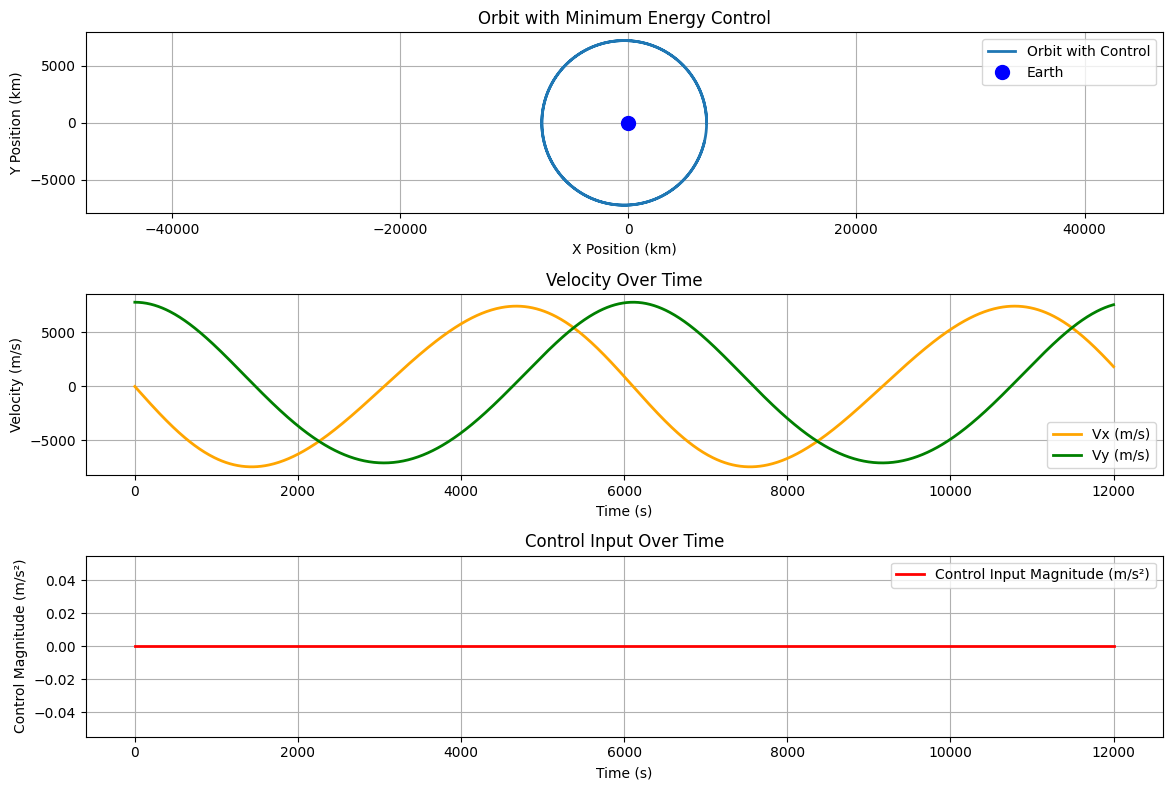

In [4]:
# Extract velocity and control input over time
vx, vy = sol.y[2], sol.y[3]  # Velocities
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])

# Compute control input magnitude
control_magnitudes = np.linalg.norm(control_inputs, axis=1)

# Plot orbit
plt.figure(figsize=(12, 8))

# 1. 궤도 그래프
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. 속도 그래프
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. 제어 입력 그래프
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Input Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


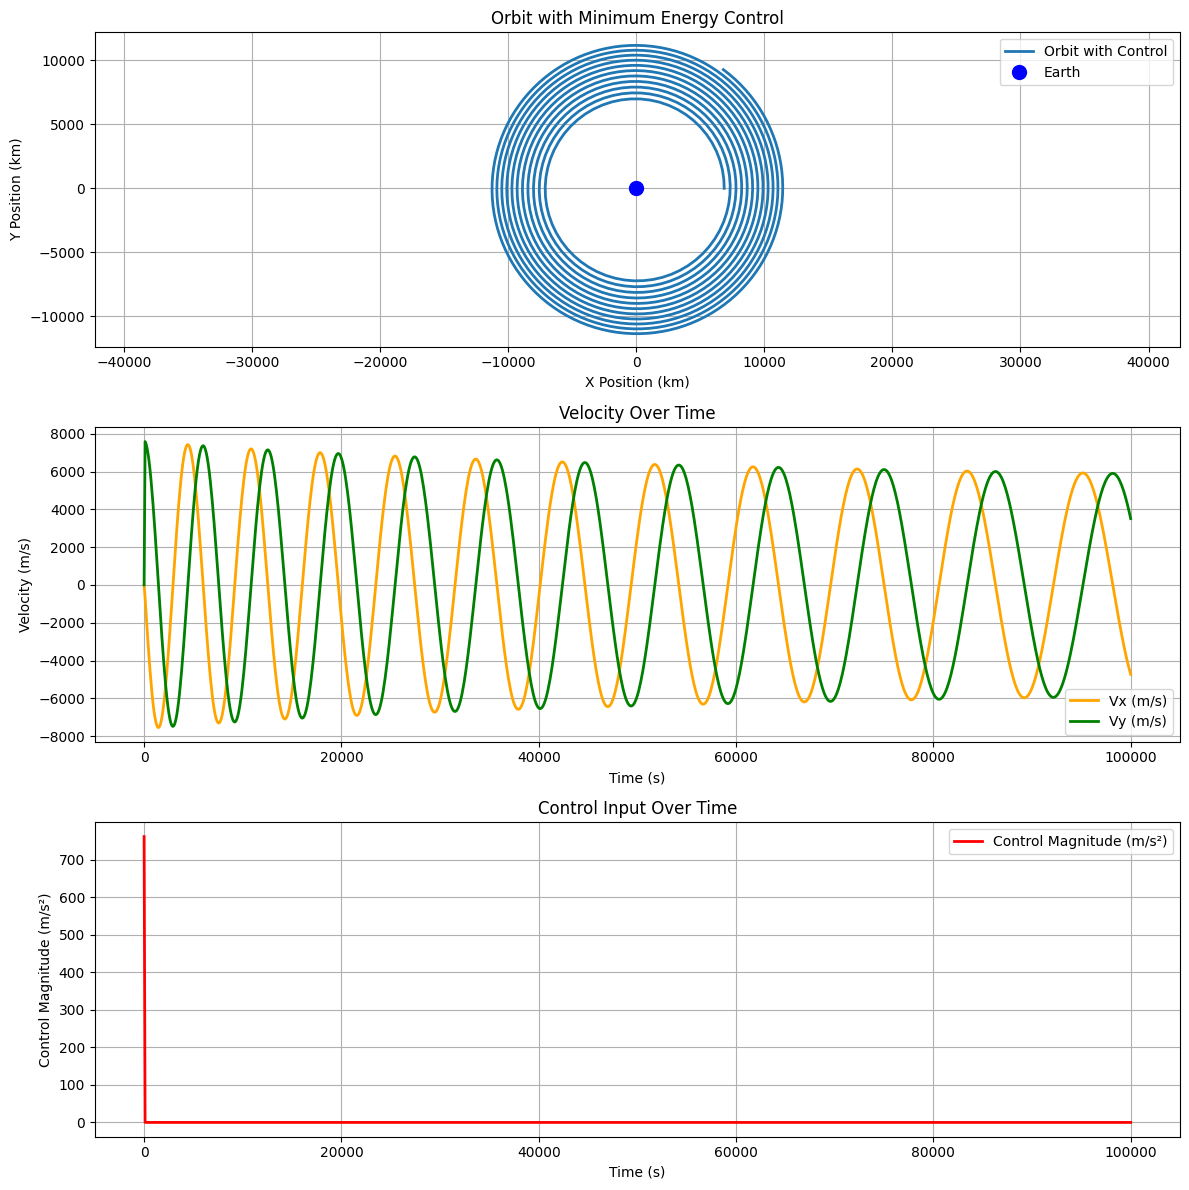

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, 0 # Initial velocity (perpendicular to position)

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function
def control_input(t, X):
    """
    Compute the control input with gravitational compensation and velocity control.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Desired circular velocity
    v_circular = np.sqrt(G * M / r)
    vx_desired = -v_circular * (y / r)
    vy_desired = v_circular * (x / r)

    # Proportional control for velocity
    k_v = 0.1  # Velocity control gain
    ux_velocity = k_v * (vx_desired - vx)
    uy_velocity = k_v * (vy_desired - vy)
    
    # Gravitational control
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3

    # Total control input
    ux = ux_velocity - ax_gravity
    uy = uy_velocity - ay_gravity
    return np.array([ux, uy])

# Define orbital dynamics with control
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 100000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs, axis=1)  # Compute control magnitude

# Plot results
plt.figure(figsize=(12, 12))

# 1. 궤도 그래프
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. 속도 그래프
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. 제어 입력 그래프
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


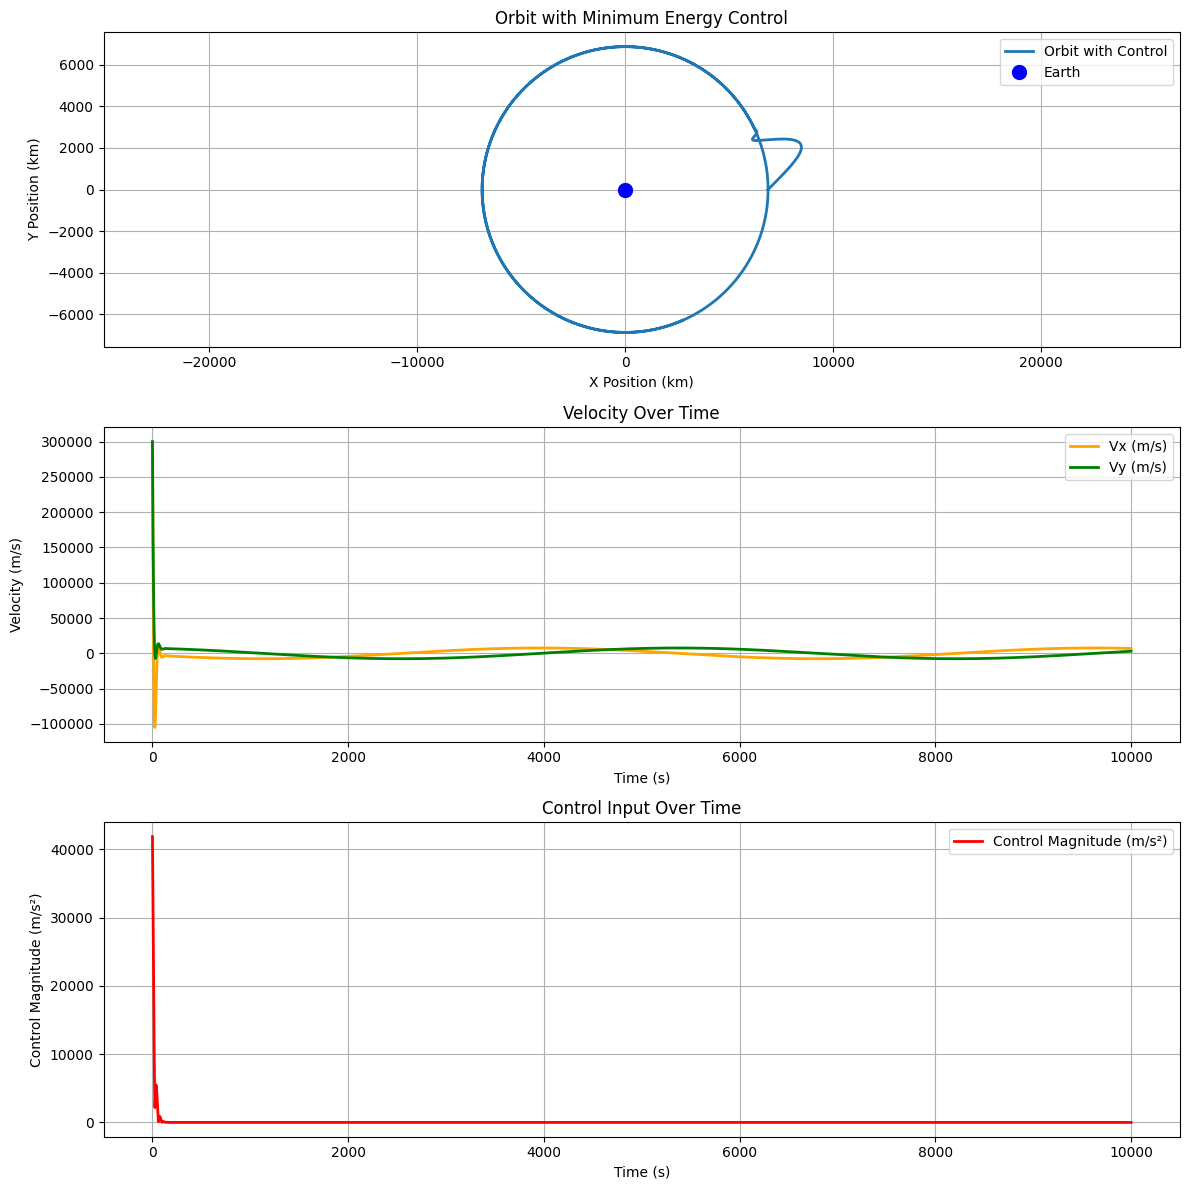

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 300e3, 300e3 # Initial velocity (perpendicular to position)

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function with position and velocity control
def control_input(t, X):
    """
    Compute the control input with position and velocity correction.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Target orbit parameters
    r_target = R + 500e3  # Target altitude (500 km above surface)
    v_circular = np.sqrt(G * M / r_target)  # Circular velocity at target orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)
    
    # Control gains
    k_p = 0.01  # Position control gain
    k_v = 0.1   # Velocity control gain
    
    # Position control
    ux_position = k_p * (r_target - r) * (x / r)
    uy_position = k_p * (r_target - r) * (y / r)
    
    # Velocity control
    ux_velocity = k_v * (vx_desired - vx)
    uy_velocity = k_v * (vy_desired - vy)
    
    # Gravitational compensation
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Total control input
    ux = ux_position + ux_velocity - ax_gravity
    uy = uy_position + uy_velocity - ay_gravity
    return np.array([ux, uy])


# Define orbital dynamics with control
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Total acceleration
    ax = ax_gravity + ux
    ay = ay_gravity + uy
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 10000  # Simulation time in seconds
t_eval = np.linspace(0, T, 10000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs, axis=1)  # Compute control magnitude

# Plot results
plt.figure(figsize=(12, 12))

# 1. 궤도 그래프
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. 속도 그래프
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. 제어 입력 그래프
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


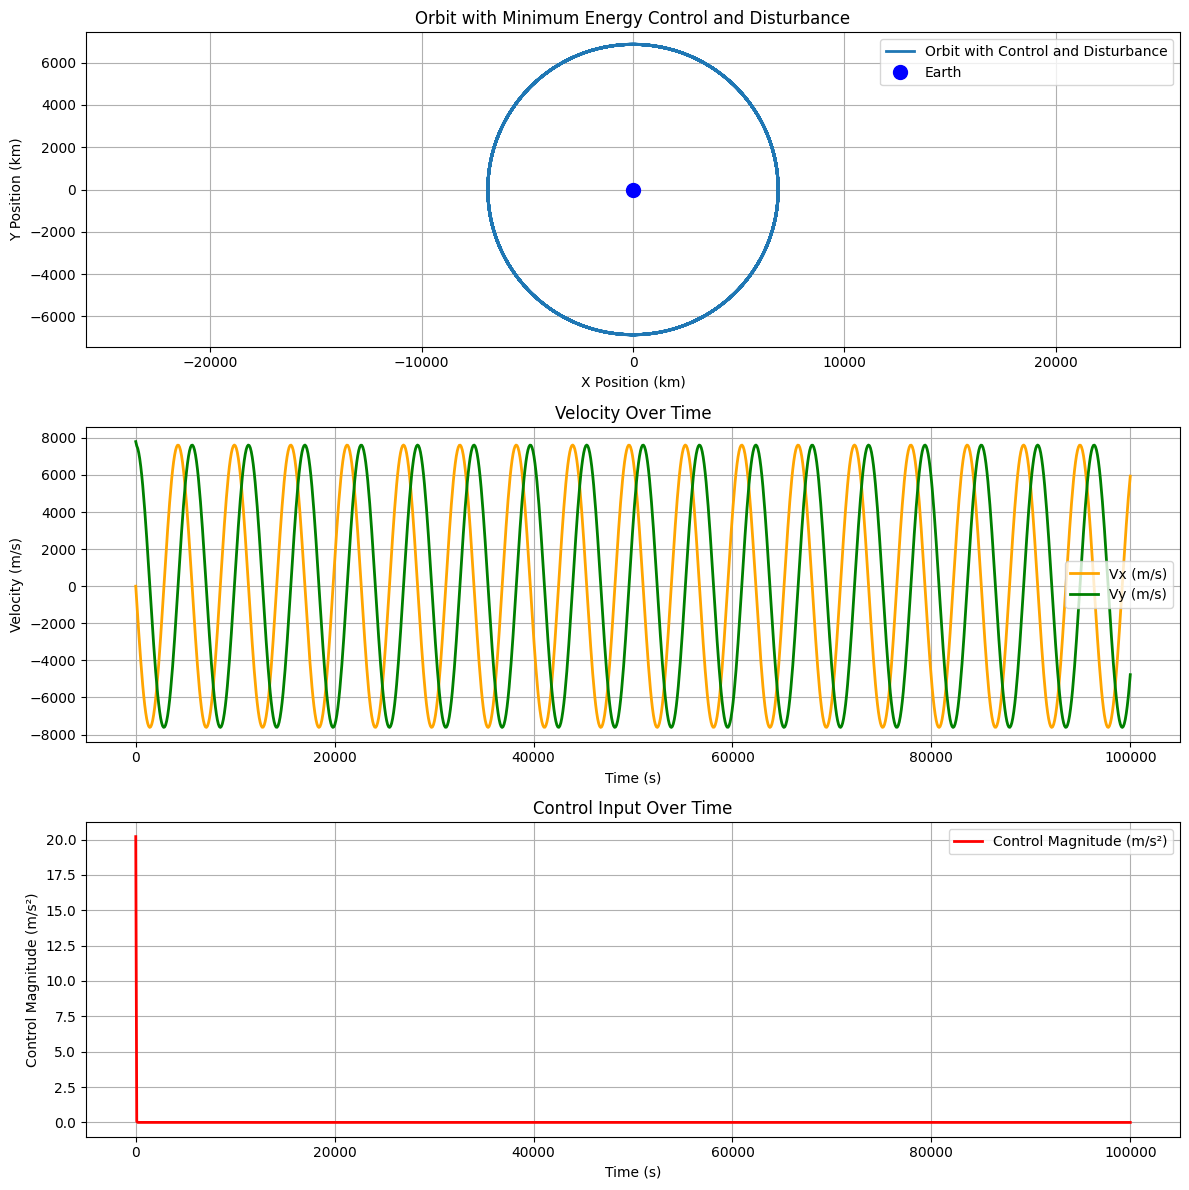

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
R = 6.371e6      # Earth's radius (m)
m = 500          # Satellite mass (kg)

# Initial conditions
r0 = R + 500e3   # Initial altitude (500 km above Earth's surface)
v0 = 7.8e3       # Approximate orbital velocity (m/s)
x0, y0 = r0, 0   # Initial position (on the x-axis)
vx0, vy0 = 0, v0 # Initial velocity (perpendicular to position)

# State vector: [x, y, vx, vy]
X0 = [x0, y0, vx0, vy0]

# Define control input function
def control_input(t, X):
    """
    Compute the control input with position and velocity correction.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Control acceleration [ux, uy].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Target orbit parameters
    r_target = R + 500e3  # Target altitude (500 km above surface)
    v_circular = np.sqrt(G * M / r_target)  # Circular velocity at target orbit
    vx_desired = -v_circular * (y / r_target)
    vy_desired = v_circular * (x / r_target)
    
    # Control gains
    k_p = 0.01  # Position control gain
    k_v = 0.1   # Velocity control gain
    
    # Position control
    ux_position = k_p * (r_target - r) * (x / r)
    uy_position = k_p * (r_target - r) * (y / r)
    
    # Velocity control
    ux_velocity = k_v * (vx_desired - vx)
    uy_velocity = k_v * (vy_desired - vy)
    
    # Gravitational compensation
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Total control input
    ux = ux_position + ux_velocity - ax_gravity
    uy = uy_position + uy_velocity - ay_gravity
    return np.array([ux, uy])

# Define orbital dynamics with control and disturbance
def orbital_dynamics(t, X):
    """
    Orbital dynamics with control input and disturbance.
    
    Args:
        t (float): Current time.
        X (array): Current state vector [x, y, vx, vy].
    
    Returns:
        array: Time derivative of the state vector [vx, vy, ax, ay].
    """
    x, y, vx, vy = X
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_gravity = -G * M * x / r**3
    ay_gravity = -G * M * y / r**3
    
    # Control input
    ux, uy = control_input(t, X)
    
    # Disturbance (random and periodic)
    random_disturbance = 100e-4 * np.random.randn(2)  # Small random disturbance
    periodic_disturbance = 100e-4 * np.array([np.sin(2 * np.pi * t / 1000), np.cos(2 * np.pi * t / 1000)])  # Periodic disturbance
    
    disturbance = random_disturbance + periodic_disturbance
    
    # Total acceleration
    ax = ax_gravity + ux + disturbance[0]
    ay = ay_gravity + uy + disturbance[1]
    
    return [vx, vy, ax, ay]

# Solve the dynamics
T = 100000  # Simulation time in seconds
t_eval = np.linspace(0, T, 1000)  # Time points
sol = solve_ivp(orbital_dynamics, [0, T], X0, t_eval=t_eval, rtol=1e-8, atol=1e-8)

# Extract results
x, y = sol.y[0], sol.y[1]
vx, vy = sol.y[2], sol.y[3]
control_inputs = np.array([control_input(t, sol.y[:, i]) for i, t in enumerate(sol.t)])
control_magnitudes = np.linalg.norm(control_inputs, axis=1)  # Compute control magnitude

# Plot results
plt.figure(figsize=(12, 12))

# 1. Orbit plot
plt.subplot(3, 1, 1)
plt.plot(x / 1e3, y / 1e3, label="Orbit with Control and Disturbance", linewidth=2)
plt.plot(0, 0, 'o', label="Earth", color='blue', markersize=10)
plt.xlabel("X Position (km)")
plt.ylabel("Y Position (km)")
plt.title("Orbit with Minimum Energy Control and Disturbance")
plt.legend()
plt.axis('equal')
plt.grid()

# 2. Velocity plot
plt.subplot(3, 1, 2)
plt.plot(sol.t, vx, label="Vx (m/s)", color="orange", linewidth=2)
plt.plot(sol.t, vy, label="Vy (m/s)", color="green", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()

# 3. Control input plot
plt.subplot(3, 1, 3)
plt.plot(sol.t, control_magnitudes, label="Control Magnitude (m/s²)", color="red", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Control Magnitude (m/s²)")
plt.title("Control Input Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
